<a href="https://colab.research.google.com/github/PS-K/Step-presentation/blob/main/Actual_project_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opencv-python
!pip install pandas
import cv2
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


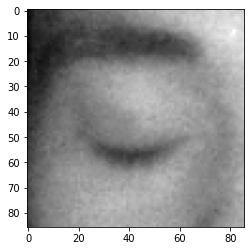

In [5]:
# Load the Drive helper and mount
img_array = cv2.imread('/content/drive/MyDrive/Dataset/Drowsiness/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap="gray")

In [6]:
img_array.shape

(86, 86)

In [7]:
import os

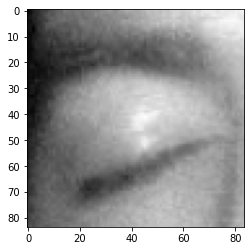

In [8]:
Datadirectory = r'/content/drive/MyDrive/Dataset/Drowsiness/train'
Classes = ['Closed_Eyes', 'Open_Eyes']
# Datadirectory = 'dataset_new/train/'
# Classes = ['Closed', 'Open']
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

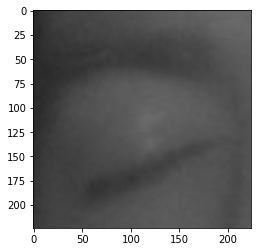

In [9]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [10]:
training_data = []

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
        except Exception as e:
          pass

In [11]:
create_training_data()
print(len(training_data))

4000


In [12]:
import random
random.shuffle(training_data)
#here we reshape the image.
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [13]:
X.shape
(4000, 224, 224, 3)
X = X/255.0
Y = np.array(y)

In [14]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:

!pip install cython h5py --user

In [16]:
model = tf.keras.applications.mobilenet.MobileNet()

In [17]:
model.summary()


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [18]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

In [19]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [20]:
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [21]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])


In [22]:
new_model.fit(X,Y, epochs = 2, validation_split = 0.1)

Epoch 1/2
113/113 [==============================] - 53s 328ms/step - loss: 0.0314 - accuracy: 0.9897 - val_loss: 5.5842e-04 - val_accuracy: 1.0000
Epoch 2/2
113/113 [==============================] - 36s 317ms/step - loss: 1.2445e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000


In [23]:
new_model.save('my_model.h5')

In [24]:
new_model = tf.keras.models.load_model('my_model.h5')

In [26]:
img_array = cv2.imread('/content/drive/MyDrive/Dataset/Drowsiness/train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [27]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [28]:
X_input.shape

(1, 224, 224, 3)

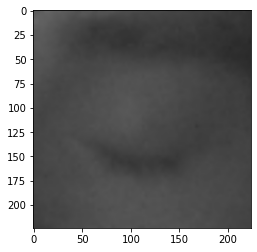

In [37]:
plt.imshow(new_array)


In [41]:
X_input = X_input/255.0
prediction_val = new_model.predict(X_input)
if prediction_val <=0.1:
  prediction="closed"
elif prediction_val >=0.9:
  prediction="Opened"

In [42]:
prediction

'closed'